**Problem Statment**

Banks run into losses when customers don't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this Dataset , we look at various attributes such as funded amount, location, loan, balance, etc., to predict whether a person will be a loan defaulter.
To solve this problem, we  has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The dataset demands a few pre-requisite skills like how to handle datasets, underfitting vs overfitting, and the ability to optimize “log_loss” to generalize well on unseen data.


**Description of Attributes:**


•	ID: unique ID of representative

•	Loan Amount: loan amount applied

•	Funded Amount: loan amount funded

•	Funded Amount Investor: loan amount approved by the investors

•	Term: term of loan (in months)

•	Batch Enrolled: batch numbers to representatives

•	Interest Rate: interest rate (%) on loan

•	Grade: grade by the bank

•	Sub Grade: sub-grade by the bank

•	Debit to Income: ratio of representative's total monthly debt repayment       divided by self-reported monthly income excluding mortgage

•	Delinquency - two years: number of 30+ days delinquency in past 2 - years

•	Inquires - six months: total number of inquiries in last 6 months

•	Open Account: number of open credit line in representative's - credit line

•	Public Record: number of derogatory public records

•	Revolving Balance: total credit revolving balance

•	Revolving Utilities: amount of credit a representative is using - relative to revolving_balance

•	Total Accounts: total number of credit lines available in - representatives credit line

•	Initial List Status: unique listing status of the loan - - W(Waiting), F(Forwarded)

•	Total Received Interest: total interest received till date

•	Total Received Late Fee: total late fee received till date

•	Recoveries: post charge off gross recovery

•	Collection Recovery Fee: post charge off collection fee

•	Collection 12 months Medical: total collections in last 12 months - excluding medical collections

•	Application Type: indicates when the representative is an individual or joint

•	Last week Pay: indicates how long (in weeks) a representative has paid EMI after batch enrolled

•	Accounts Delinquent: number of accounts on which the representative is delinquent

•	Total Collection Amount: total collection amount ever owed

•	Total Current Balance: total current balance from all accounts

•	Total Revolving Credit Limit: total revolving credit limit

•	Loan Status: 1 = Defaulter, 0 = Non-Defaulters

In [ ]:
import numpy as np

import pandas as pd

In [ ]:
train1=pd.read_csv('/content/train.csv')
test1=pd.read_csv('/content/test.csv')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
train1.shape

(67463, 35)

In [ ]:
test1.shape

(28913, 34)

In [ ]:
train1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
train1.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,83961.15003,Verified,n,Credit card refinancing,28.105127,1,0,13,0,4112,97.779389,19,w,1978.945960,0.023478,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,65491.12817,Source Verified,n,Credit card refinancing,17.694279,0,0,12,0,9737,15.690703,14,w,3100.803125,0.027095,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,34813.96985,Verified,n,Lending loan,10.295774,0,0,7,1,2195,1.500090,9,w,2691.995532,0.028212,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,96938.83564,Not Verified,n,Debt consolidation,7.614624,0,0,14,0,1172,68.481882,15,f,3659.334202,0.074508,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0
67462,65443173,15353,29875,14207.44860,59,BAT1930365,16.034631,B,D1,MORTGAGE,105123.15580,Verified,n,Debt consolidation,16.052112,0,0,30,0,8762,81.692328,16,f,1324.255922,0.000671,1.856480,0.366386,0,INDIVIDUAL,54,0,47,196960,66060,0


In [ ]:
test1.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
0,56492997,17120,10365,16025.082690,59,BAT2575549,12.163926,A,D1,RENT,76468.82190,Source Verified,n,Home improvement,16.749219,1,0,12,1,3576,67.278287,5,f,4469.449851,0.088031,8.425776,0.731797,0,INDIVIDUAL,135,0,24,475442,4364
1,22540813,7133,11650,12615.795600,59,BAT2833642,6.564296,B,E3,MORTGAGE,38079.01344,Source Verified,n,Credit card refinancing,18.157975,0,0,11,0,1932,71.313157,21,w,993.907530,0.041237,6.157008,0.992918,0,INDIVIDUAL,56,0,1,72412,2573
2,9862181,25291,25825,11621.280830,59,BAT1761981,14.729900,A,C3,MORTGAGE,51275.93268,Source Verified,n,Debt consolidation,15.190011,0,0,22,0,598,50.883065,23,f,729.113379,0.021745,5.705077,0.281580,0,INDIVIDUAL,3,0,26,284825,19676
3,10097822,30781,9664,15375.823510,59,BAT5341619,10.523767,A,A2,RENT,68867.98965,Verified,n,Debt Consolidation,21.292550,0,0,11,0,5222,82.449083,28,w,715.867091,0.092398,2.469688,0.959162,0,INDIVIDUAL,21,0,32,40842,7226
4,47771809,8878,9419,7176.647582,58,BAT4694572,9.997013,C,B3,OWN,91556.85423,Verified,n,Debt consolidation,4.812117,0,0,11,0,553,49.075855,9,w,248.572854,0.010354,2.127835,0.402315,0,INDIVIDUAL,104,0,33,90825,26145


In [ ]:
train1.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
train1.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,6.225060,0.346606,7836.148190,22.539450,8.319246,2221.918745,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,10.000000,0.000000,2557.000000,38.658825,13.000000,570.903814,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,13.000000,0.000000,5516.000000,54.082334,18.000000,1330.842771,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,16.000000,0.000000,10184.500000,69.177117,23.000000,2656.956837,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [ ]:
test1.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,13.663439,0.111092,9937.451423,53.860078,20.398540,1917.754435,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,6.114777,0.388741,10931.313717,22.801701,9.650339,2109.442877,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4.000000,4.794657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,10.000000,0.000000,3177.000000,38.997949,14.000000,524.130000,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,12.000000,0.000000,6769.000000,54.867003,19.000000,1216.347147,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,15.000000,0.000000,12803.000000,70.521791,25.000000,2474.594118,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,37.000000,4.000000,188657.000000,100.799622,73.000000,14313.816110,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000


In [ ]:
train1.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [ ]:
test1.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [ ]:
train1.nunique()

ID                              67463
Loan Amount                     27525
Funded Amount                   24548
Funded Amount Investor          67441
Term                                3
Batch Enrolled                     41
Interest Rate                   67448
Grade                               7
Sub Grade                          35
Employment Duration                 3
Home Ownership                  67454
Verification Status                 3
Payment Plan                        1
Loan Title                        109
Debit to Income                 67454
Delinquency - two years             9
Inquires - six months               6
Open Account                       36
Public Record                       5
Revolving Balance               20582
Revolving Utilities             67458
Total Accounts                     69
Initial List Status                 2
Total Received Interest         67451
Total Received Late Fee         67380
Recoveries                      67387
Collection R

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Axes: >

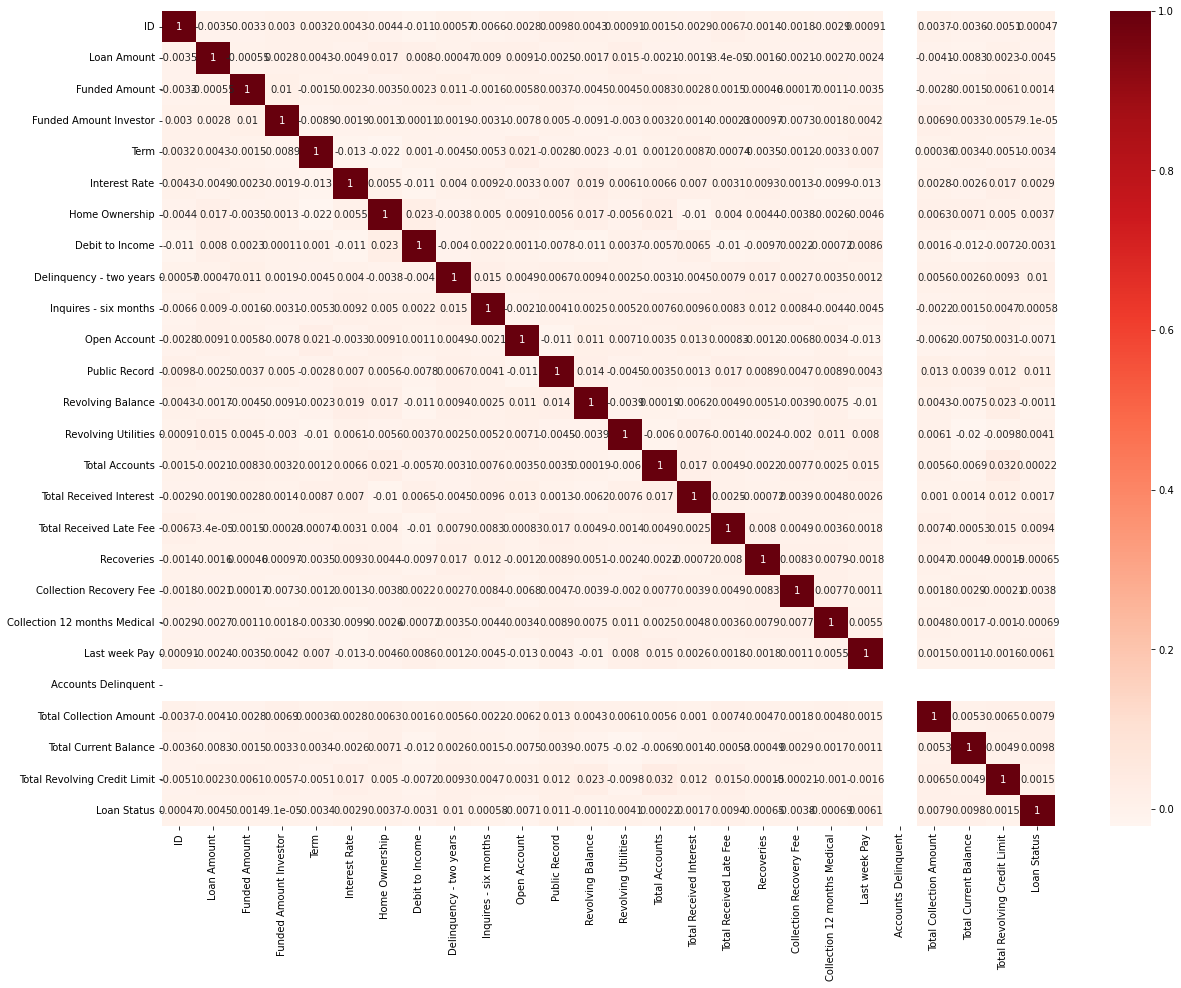

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(train1.corr(),annot=True,cmap='Reds')

In [ ]:
train1["Loan Status"].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [ ]:
train1["Loan Status"].value_counts(normalize=True)*100

0    90.749003
1     9.250997
Name: Loan Status, dtype: float64

<Axes: title={'center': 'Loan Pay or not pay status'}>

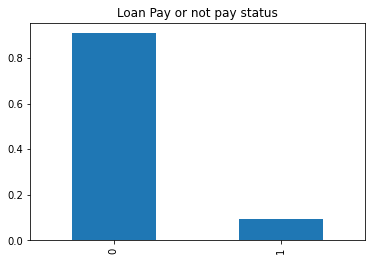

In [ ]:
train1["Loan Status"].value_counts(normalize=True).plot.bar(title = 'Loan Pay or not pay status')

90.18% of the loans are classified as "Non-Defaulters" (coded as 0.0) successfully repaid their loan.

9.82% of the loans are classified as "Defaulters" (coded as 1.0) failed to repay the loan.


In [ ]:
train1["Term"].value_counts()

59    43780
58    22226
36     1457
Name: Term, dtype: int64

In [ ]:
train1["Term"].value_counts(normalize=True)*100

59    64.894831
58    32.945466
36     2.159702
Name: Term, dtype: float64

<Axes: title={'center': 'Term of loan in months'}>

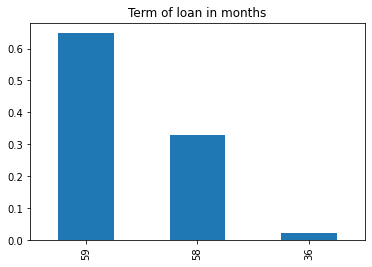

In [ ]:
train1["Term"].value_counts(normalize=True).plot.bar(title = 'Term of loan in months')

It indicates that the majority of loans (about 65%) have a term of 59 months, followed by 32% with a term of 58 months. A small proportion of loans (about 2%) have a term of 36 months.

Loan Status              0     1
Verification Status             
Not Verified         14843  1506
Source Verified      29951  3085
Verified             16428  1650


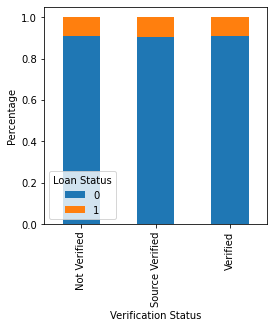

In [ ]:
print(pd.crosstab(train1["Verification Status"], train1["Loan Status"]))
verification_status = pd.crosstab(train1["Verification Status"], train1["Loan Status"])
verification_status.div(verification_status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Verification Status")
plt.ylabel("Percentage")
plt.show()


Looking at the 'Verification Status' column, we can see that the highest number of loan applicants come from the "Source Verified" category, with 3,701 total applicants. However, the "Not Verified" category has the highest proportion of defaulters, with 10.86% of applicants in this category defaulting on their loans, compared to 9.45% in the "Source Verified" category and only 8.87% in the "Verified" category

Loan Status           0     1
Application Type             
INDIVIDUAL        61110  6230
JOINT               112    11


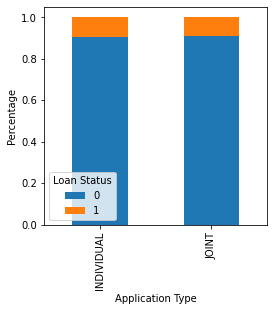

In [ ]:
print(pd.crosstab(train1["Application Type"], train1["Loan Status"]))
Application_Type = pd.crosstab(train1["Application Type"], train1["Loan Status"])
Application_Type.div(Application_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Application Type")
plt.ylabel("Percentage")
plt.show()



The majority of the loans are INDIVIDUAL loans, with 61110 non-defaulted(Successful repay) and 6230 defaulted loans(failed to repay). The JOINT application type has a much smaller number of loans, with only 112 non-defaulted and 11 defaulted loan.

Loan Status      0     1
Grade                   
A            10955  1100
B            17107  1635
C            17293  1792
D             7463   796
E             5828   618
F             2013   233
G              563    67


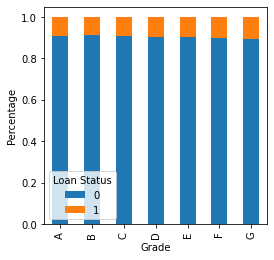

In [ ]:
print(pd.crosstab(train1["Grade"], train1["Loan Status"]))
Grade= pd.crosstab(train1["Grade"], train1["Loan Status"])
Grade.div(Grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Grade")
plt.ylabel("Percentage")
plt.show()


From this, it can be seen that the majority of loans are in grades A, B, and C. The count of defaulted loans is higher in lower grades (D, E, F, G) compared to higher grades (A, B, C), indicating that borrowers with lower credit quality are more likely to default on their loans.

Loan Status                       0     1
Collection 12 months Medical             
0                             59916  6110
1                              1306   131


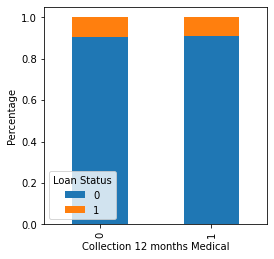

In [ ]:
print(pd.crosstab(train1["Collection 12 months Medical"], train1["Loan Status"]))
Medical= pd.crosstab(train1["Collection 12 months Medical"], train1["Loan Status"])
Medical.div(Medical.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Collection 12 months Medical")
plt.ylabel("Percentage")
plt.show()

the data suggests that borrowers who have had a medical collection account for the past 12 months are more likely to default on their loans compared to those who have not had a medical collection account.

Loan Status              0     1
Employment Duration             
MORTGAGE             33128  3223
OWN                   6255   707
RENT                 21839  2311


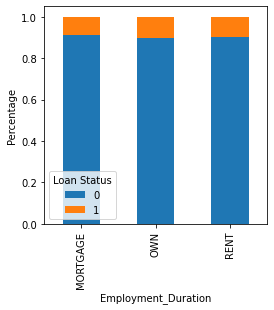

In [ ]:
print(pd.crosstab(train1["Employment Duration"], train1["Loan Status"]))
Employment_Duration= pd.crosstab(train1["Employment Duration"], train1["Loan Status"])
Employment_Duration.div(Employment_Duration.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel("Employment_Duration")
plt.ylabel("Percentage")
plt.show()


It indicates that most borrowers with MORTGAGE as their employment duration have a non-default loan status (0.0) whereas those with OWN or RENT as their employment duration have a relatively higher number of defaulted loans (1.0). This information could be useful in predicting the loan status of future borrowers based on their employment duration category.

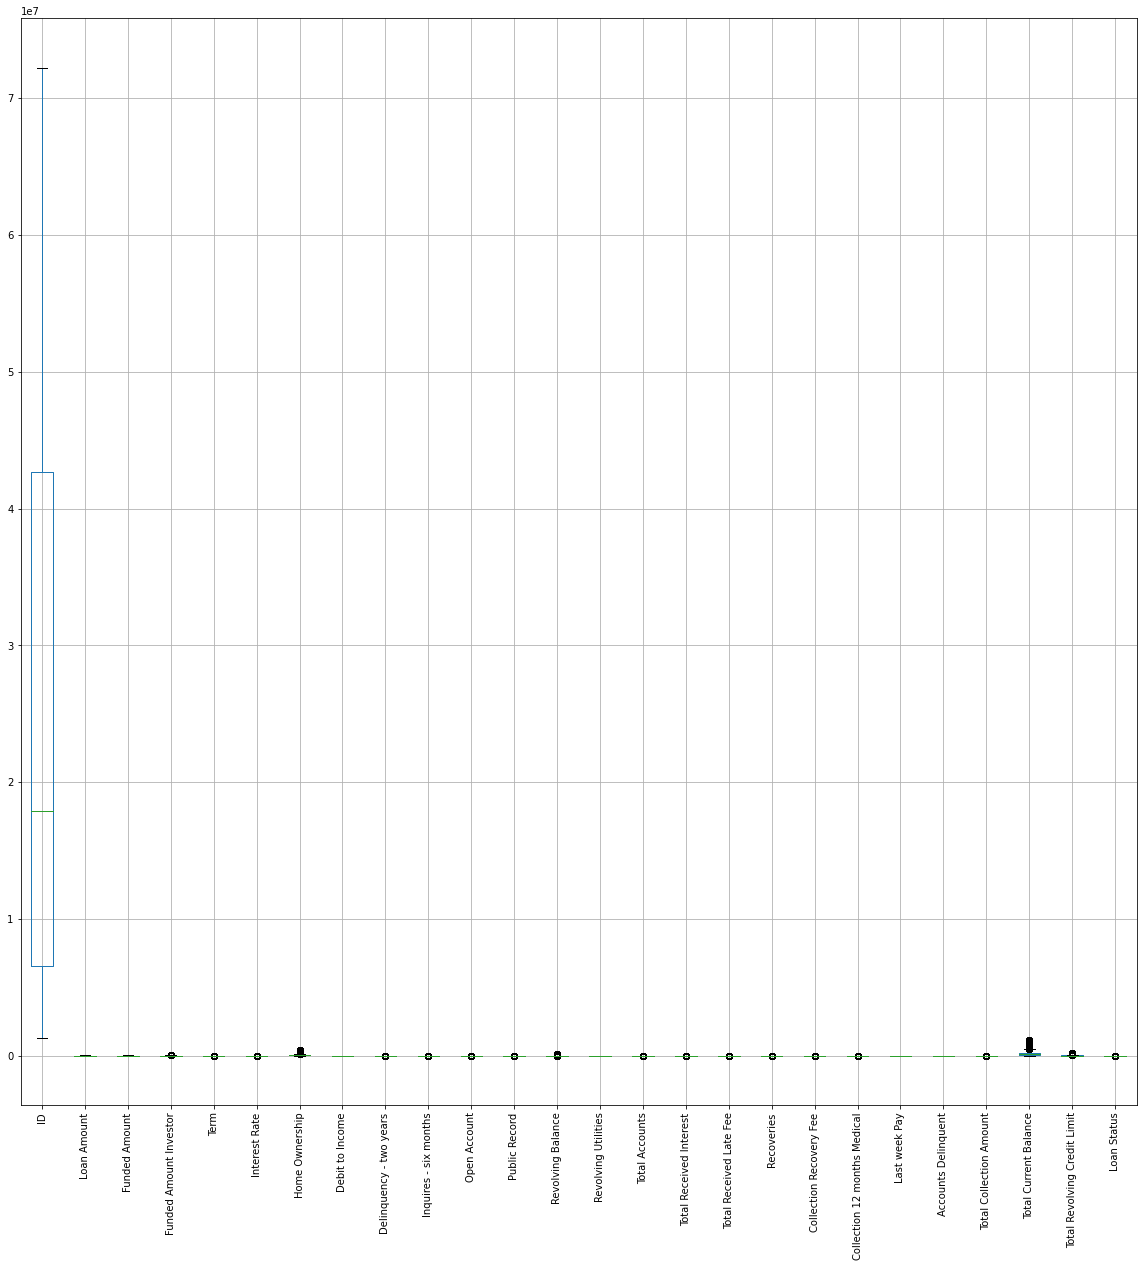

In [ ]:
# Create a boxplot for all numerical variables
train1.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [ ]:
categorical_list=['Batch Enrolled', 'Grade','Sub Grade', 'Employment Duration','Verification Status','Payment Plan', 'Loan Title','Initial List Status', 'Application Type']

In [ ]:
for i in categorical_list:
  train1[i]=train1[i].astype('category').cat.codes

In [ ]:
train1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Payment Plan                       int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64


In [ ]:
test1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                   object
Interest Rate                   float64
Grade                            object
Sub Grade                        object
Employment Duration              object
Home Ownership                  float64
Verification Status              object
Payment Plan                     object
Loan Title                       object
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status              object
Total Received Interest         float64
Total Received Late Fee         float64


In [ ]:
categorical_list=['Batch Enrolled', 'Grade','Sub Grade', 'Employment Duration','Verification Status','Payment Plan', 'Loan Title','Initial List Status', 'Application Type']

In [ ]:
for i in categorical_list:
  test1[i]=test1[i].astype('category').cat.codes

In [ ]:
test1.dtypes

ID                                int64
Loan Amount                       int64
Funded Amount                     int64
Funded Amount Investor          float64
Term                              int64
Batch Enrolled                     int8
Interest Rate                   float64
Grade                              int8
Sub Grade                          int8
Employment Duration                int8
Home Ownership                  float64
Verification Status                int8
Payment Plan                       int8
Loan Title                         int8
Debit to Income                 float64
Delinquency - two years           int64
Inquires - six months             int64
Open Account                      int64
Public Record                     int64
Revolving Balance                 int64
Revolving Utilities             float64
Total Accounts                    int64
Initial List Status                int8
Total Received Interest         float64
Total Received Late Fee         float64
